<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [5]:
%pip install seaborn 

import pandas as pd

<ipython-input-5-4b0746976c35>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [1]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [3]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [6]:
df = pd.read_csv(file_name)

<class 'NameError'>: name 'pd' is not defined

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

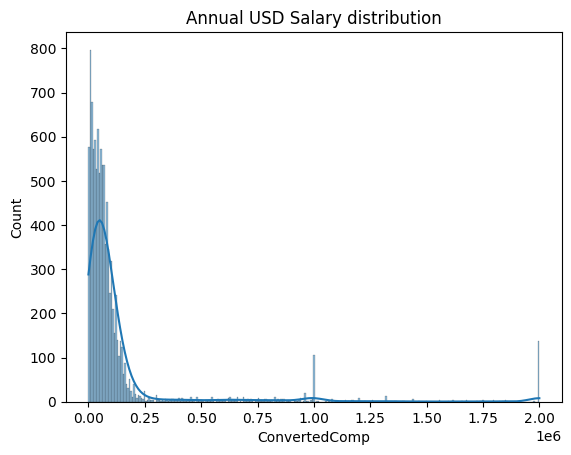

In [12]:
sns.histplot(x=df["ConvertedComp"],kde=True)
plt.title("Annual USD Salary distribution")
plt.xlabel
plt.ylabel

Plot the histogram for the column `ConvertedComp`.


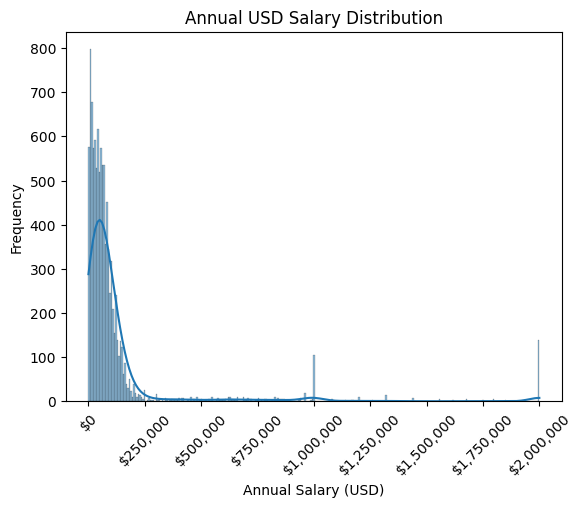

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Plot del histograma para la columna 'ConvertedComp'
sns.histplot(x=df["ConvertedComp"], kde=True)

# Personalización del gráfico
plt.title("Annual USD Salary Distribution")
plt.xlabel("Annual Salary (USD)")
plt.ylabel("Frequency")

# Formatear el eje x para mostrar los valores en formato de dinero (USD)
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

# Limitar la cantidad de ticks en el eje x
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # Ajusta 'nbins' según sea necesario

# Mostrar el gráfico
plt.show()




What is the median of the column `ConvertedComp`?


In [23]:
mediana = df["ConvertedComp"].median()
mediana

57745.0

How many responders identified themselves only as a **Man**?


In [27]:
man_num = df[df["Gender"] == "Man"].shape[0]
man_num

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [35]:
woman_median = df[df["Gender"] == "Woman"]["ConvertedComp"].median()
woman_median

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [40]:
df["Age"].describe()


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

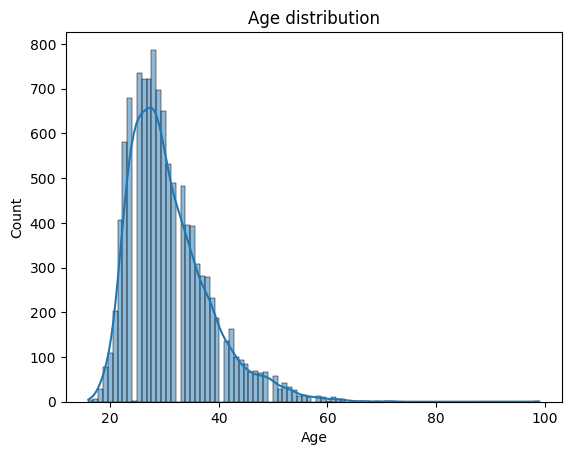

In [41]:
sns.histplot(x=df["Age"],kde=True)
plt.title("Age distribution")
plt.xlabel
plt.ylabel


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


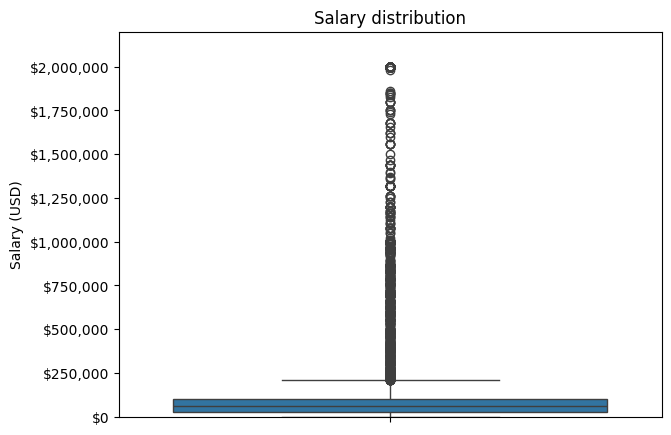

In [59]:
# Crear un box plot
plt.figure(figsize=(7, 5))  # Ajustar el tamaño de la figura
sns.boxplot(y='ConvertedComp', data=df)

# Añadir título y etiquetas
plt.title('Salary distribution')
plt.ylabel('Salary (USD)')
plt.xlabel('')  # Puede dejarse vacío si no hay etiqueta en x

# Formatear el eje y como cifras monetarias
def format_func(value, tick_number):
    return f'${value:,.0f}'  # Formato como cifra monetaria

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Ajustar límites del eje y si es necesario
plt.ylim(0, df['ConvertedComp'].max() * 1.1)  # Incrementa el límite superior si es necesario

# Mostrar el gráfico
plt.show()



Find out the Inter Quartile Range for the column `ConvertedComp`.


In [63]:
Q1 = df["ConvertedComp"].quantile(0.75)
Q3 = df["ConvertedComp"].quantile(0.25)

IQR = Q1 - Q3
print(IQR)


73132.0


Find out the upper and lower bounds.


In [67]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular los límites superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mostrar resultados
print(f'Inferior limit: ${lower_bound:,.2f}')
print(f'Superior limit: ${upper_bound:,.2f}')


Inferior limit: $-82,830.00
Superior limit: $209,698.00


Identify how many outliers are there in the `ConvertedComp` column.


In [72]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]
print(f'Número de outliers en la columna ConvertedComp: {num_outliers}')

Número de outliers en la columna ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [75]:
# Crear un nuevo DataFrame eliminando los outliers
df_without_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Mostrar el nuevo DataFrame
df_without_outliers

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11392,25134,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ecuador,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,32.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,No,Appropriate in length,Easy
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [91]:
df.corr(numeric_only=True)['Age'].sort_values()

CodeRevHrs      -0.020469
Respondent       0.004041
CompTotal        0.006970
WorkWeekHrs      0.036518
ConvertedComp    0.105386
YearsCode        0.792625
Age              1.000000
Name: Age, dtype: float64

In [ ]:
R2 checking

In [96]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparar los datos
# Eliminar filas con NaN en cualquiera de las columnas
cleaned_df = df[['Age', 'YearsCode']].dropna()

# Definir X e Y
X = cleaned_df[['Age']]
Y = cleaned_df['YearsCode']

# Crear el modelo y ajustarlo
lm = LinearRegression()
lm.fit(X, Y)

# Calcular el R^2
r_squared = lm.score(X, Y)
print(f"R^2: {r_squared}")


R^2: 0.6282543036627288


In [97]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparar los datos
# Eliminar filas con NaN en cualquiera de las columnas
cleaned_df = df[['Age', 'ConvertedComp']].dropna()

# Definir X e Y
X = cleaned_df[['Age']]
Y = cleaned_df['ConvertedComp']

# Crear el modelo y ajustarlo
lm = LinearRegression()
lm.fit(X, Y)

# Calcular el R^2
r_squared = lm.score(X, Y)
print(f"R^2: {r_squared}")


R^2: 0.011106242872627847


In [ ]:
Sig. checking

In [99]:
cleaned_data = df[['Age', 'ConvertedComp']].dropna()  # Eliminar filas con NaN en cualquiera de las columnas

# Opcional: También puedes eliminar valores infinitos
cleaned_data = cleaned_data[np.isfinite(cleaned_data).all(axis=1)]

# Calcular la significancia
from scipy.stats import pearsonr

# Función para calcular la significancia de la correlación
def correlation_significance(x, y):
    corr_coefficient, p_value = pearsonr(x, y)
    return corr_coefficient, p_value

# Calcular la correlación y su significancia
corr_age_converted_comp, p_value_age_converted_comp = correlation_significance(cleaned_data['Age'], cleaned_data['ConvertedComp'])

print(f"Correlation Coefficient: {corr_age_converted_comp}, P-value: {p_value_age_converted_comp}")


Correlation Coefficient: 0.105386160726291, P-value: 5.78746021269361e-27


In [100]:
cleaned_data = df[['Age', 'YearsCode']].dropna()  # Eliminar filas con NaN en cualquiera de las columnas

# Opcional: Tambiénse puede eliminar valores infinitos
cleaned_data = cleaned_data[np.isfinite(cleaned_data).all(axis=1)]

# Ahora puedes calcular la significancia
from scipy.stats import pearsonr

# Función para calcular la significancia de la correlación
def correlation_significance(x, y):
    corr_coefficient, p_value = pearsonr(x, y)
    return corr_coefficient, p_value

# Calcular la correlación y su significancia
corr_age_YearsCode, p_value_age_YearsCode = correlation_significance(cleaned_data['Age'], cleaned_data['YearsCode'])

print(f"Correlation Coefficient: {corr_age_YearsCode}, P-value: {p_value_age_YearsCode}")

Correlation Coefficient: 0.7926249451428503, P-value: 0.0


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
